JUAN BAUTISTA OLIVERA - 2025

In [1]:
######################################
########## EJECUTAR HEADERS ##########
######################################
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as dsp
from scipy.signal import find_peaks

#######################################
############## FUNCIONES ##############
#######################################
def M_DBL(a,b):  # es muy sencillo...solamente es el producto, que en la practica se hace con un mezclador aca con numeros
    return a*b


def DEMOD_DBL(a,b,taps):

    c=a*b

    return np.convolve(c,taps,'same')


def plot_spec(signal,fs,tipo="full",win="rect"):
    espec=20*np.log10(np.abs(np.fft.fft(signal))/len(signal))
    espec=np.fft.fftshift(espec)
    fcia=np.linspace(-fs/2,fs/2,len(signal))
    if tipo=="half":
        espec=espec[len(signal)//2:]
        fcia=fcia[len(signal)//2:]
    plt.figure()
    plt.title('Espectro de la señal')
    plt.ylim(np.max(espec)-75,np.max(espec)+5)
    plt.plot(fcia,espec)

#TP1

##Ejercicio 1
 - como mensaje utilizar una señal cuadrada y que a partir del 3er armonico no entre en el filtro pasabajos
 - simular y generar las imagenes correspondientes a la señal original y recuperada despues de la demodulación
 - Que sucede si en vez de utilizar una señal senoidal de portadora utilizamos una señal cuadrada?
 - simular y generar las imagenes correspondientes a la señal original y recuperada despues de la demodulación
 - Que sucede si en vez de utilizar una señal senoidal de portadora utilizamos una exponencial compleja?
 - simular y generar las imagenes correspondientes a la señal original y recuperada despues de la demodulación



###Cuadrada - Sinusoidal

999000.0000000001


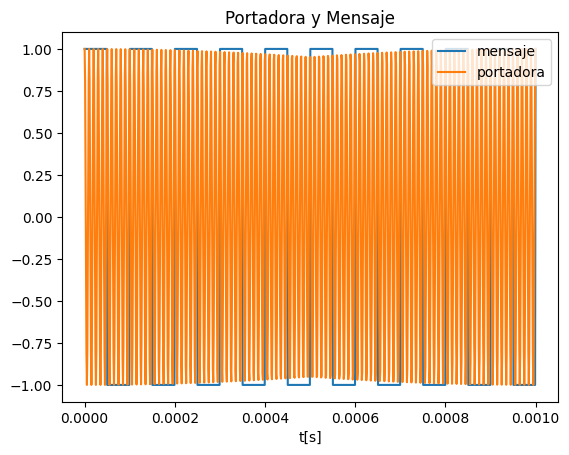

In [2]:
N=1000
t=np.linspace(0,1e-3,N) # un eje de tiempo de 1ms muestreado a 1us genera 1000 muestras
ts=t[1] # el primer diferencia entre la posicion "0" del vector de tiempo y la "1" es el tiempo de muestreo
fs=1/ts # la frecuencia de muestreo es la inversa del tiempo de muestreo
fmsj=10000 # frecuencia del mensaje Hz
fc=100000 # frecuencia de la portadora Hz

#Mensaje Señal Cuadrada, Portadora Senoidal
msj=dsp.square(2*np.pi*fmsj*t)
carrier=np.cos(2*np.pi*fc*t)
plt.figure()

plt.plot(t,msj,label="mensaje")
plt.plot(t,carrier,label="portadora")
plt.legend(loc='upper right')
plt.xlabel("t[s]")
plt.ticklabel_format(style="sci")
plt.title("Portadora y Mensaje")
print(fs)

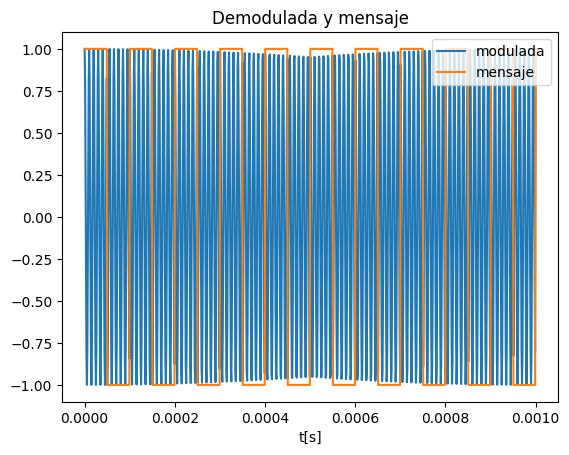

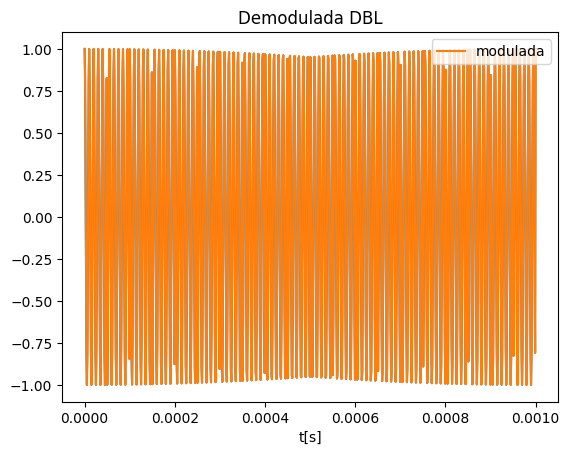

In [3]:
DBL= M_DBL(msj,carrier)
plt.figure()

plt.plot(t,DBL,label="modulada")
plt.plot(t,msj,label="mensaje")
plt.legend(loc='upper right')
plt.xlabel("t[s]")
plt.title("Demodulada y mensaje")
plt.ticklabel_format(style="sci")


plt.figure()
plt.plot(t,DBL)
plt.plot(t,DBL,label="modulada")
plt.legend(loc='upper right')
plt.xlabel("t[s]")
plt.title("Demodulada DBL")
plt.ticklabel_format(style="sci")

Text(0.5, 1.0, 'Espectro')

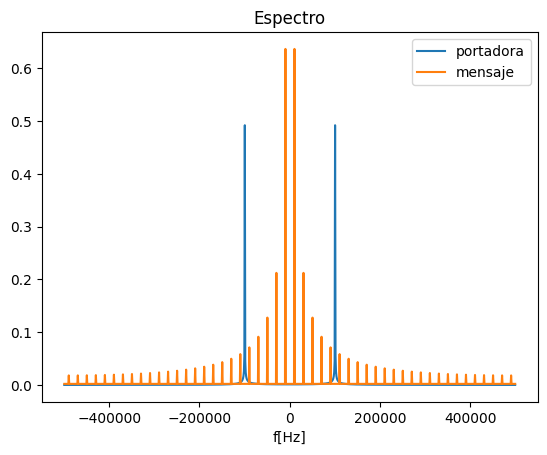

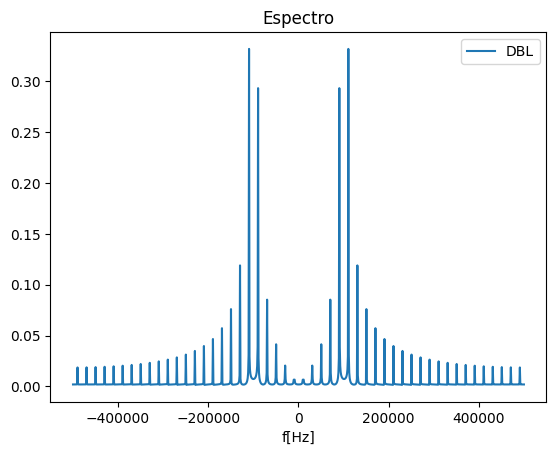

In [4]:
# en el espectro
fcia=np.linspace(-fs/2,fs/2,N)
Fcarrier=np.abs(np.fft.fftshift(np.fft.fft(carrier)))/N
Fmsj=np.abs(np.fft.fftshift(np.fft.fft(msj)))/N
plt.figure()
plt.plot(fcia,Fcarrier,label="portadora")
plt.plot(fcia,Fmsj,label="mensaje")
plt.legend(loc='upper right')
plt.xlabel("f[Hz]")
plt.title("Espectro")


FDBL=np.abs(np.fft.fftshift(np.fft.fft(DBL)))/N
plt.figure()
plt.plot(fcia,FDBL,label="DBL")
plt.legend(loc='upper right')
plt.xlabel("f[Hz]")
plt.title("Espectro")

Text(0.5, 1.0, 'Espectro')

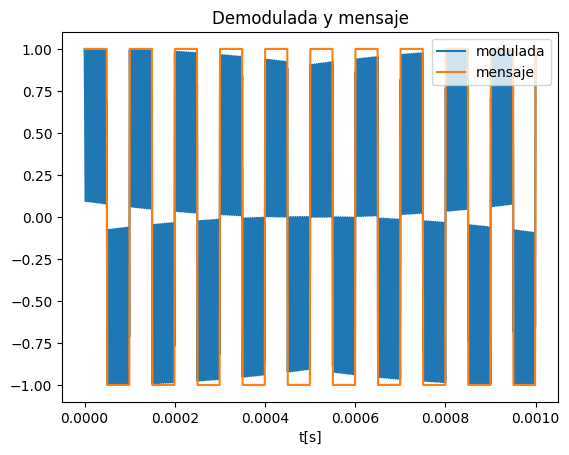

<Figure size 640x480 with 0 Axes>

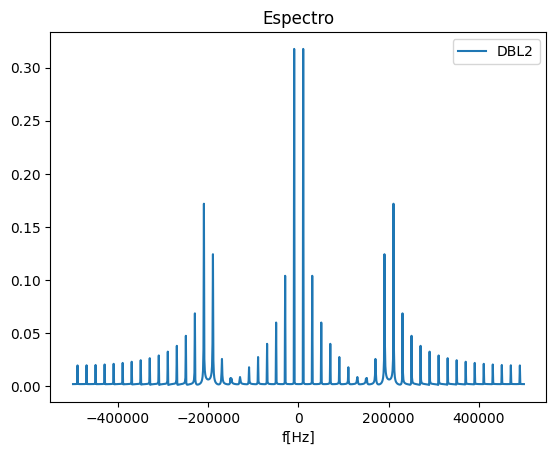

In [5]:
DBL2= M_DBL(DBL,carrier)
plt.figure()

plt.plot(t,DBL2,label="modulada")
plt.plot(t,msj,label="mensaje")
plt.legend(loc='upper right')
plt.xlabel("t[s]")
plt.title("Demodulada y mensaje")
plt.ticklabel_format(style="sci")

plt.figure()
FDBL2=np.abs(np.fft.fftshift(np.fft.fft(DBL2)))/N
plt.figure()
plt.plot(fcia,FDBL2,label="DBL2")
plt.legend(loc='upper right')
plt.xlabel("f[Hz]")
plt.title("Espectro")


Text(0.5, 1.0, 'Espectro')

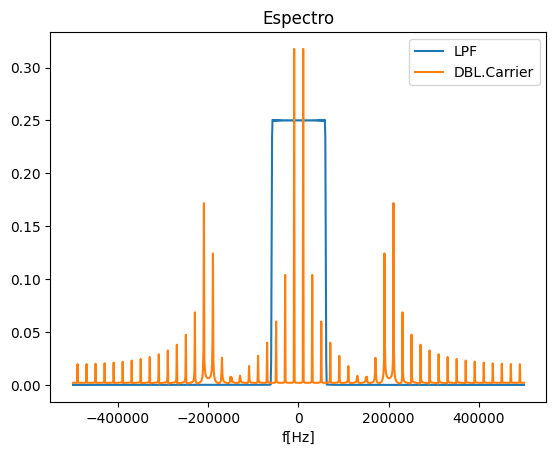

In [6]:
#Nos queda la tarea de eliminar la parte alta del espectro implementando un filtro pasa bajos.

taps=dsp.firwin(N,cutoff=60000,fs=fs) #Fc = 60KHz, lo hice a ojo con prueba y error para dejar pasar 3 armonicos nomas
LPF=np.abs(np.fft.fftshift(np.fft.fft(taps)))/N
plt.figure()
plt.plot(fcia,LPF*(N/4),label="LPF")  ## escale en (N/4) asi el filtro que sobre la es espectro como en el libro
plt.plot(fcia,FDBL2,label="DBL.Carrier")
plt.legend(loc='upper right')
plt.xlabel("f[Hz]")
plt.title("Espectro")

Text(0.5, 1.0, 'Mensaje Or')

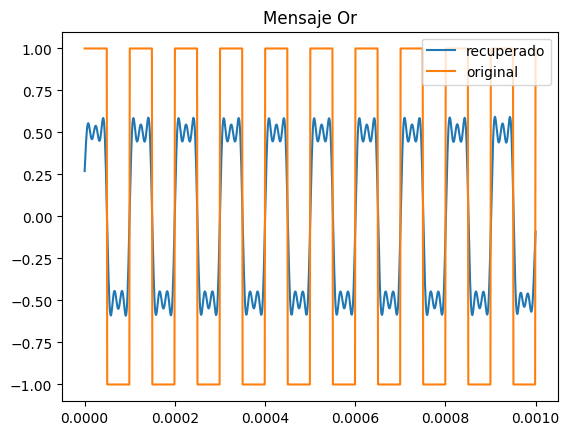

In [7]:
## Tranca... aca solamente hay que hacer el proceso de filtrado, convolucionando la respuesta del

## filtro con la señal de salida del mezclador

def DEMOD_DBL(a,b,taps):

    c=a*b

    return np.convolve(c,taps,'same')

Rx=DEMOD_DBL(DBL,carrier,taps)

Rx=np.convolve(taps,DBL2,'same')

plt.plot(t,Rx,label="recuperado")

plt.plot(t,msj,label="original")

plt.legend(loc='upper right')

plt.title("Mensaje Or")


###Sinusoidal - Cuadrada
Ahora hacemos lo mismo pero con una senoidal de mensaje y una cuadrada de portadora

999000.0000000001


Text(0.5, 1.0, 'Mensaje Or')

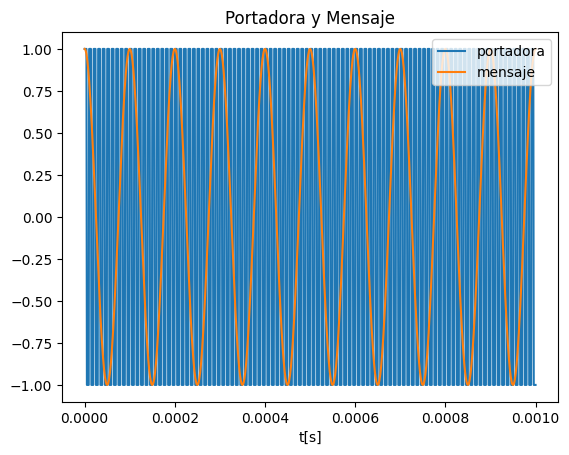

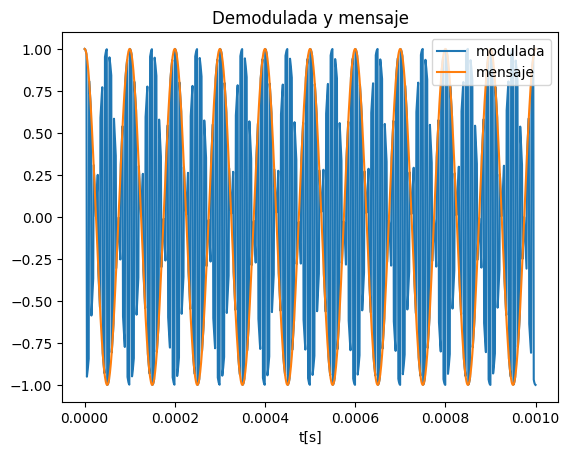

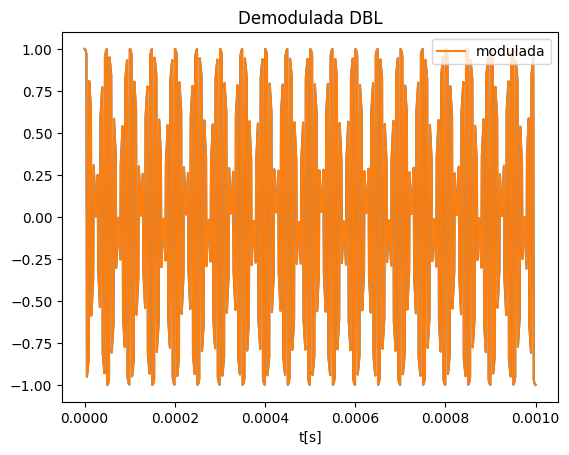

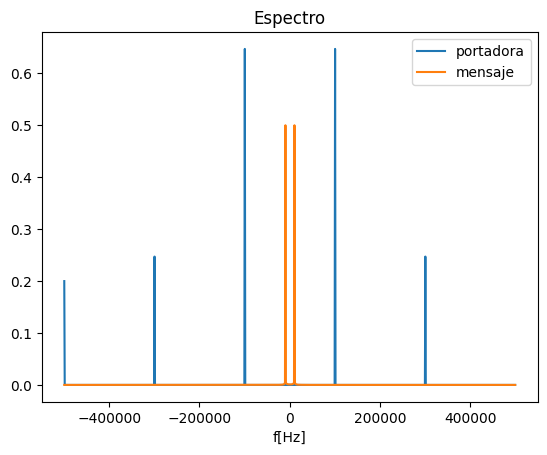

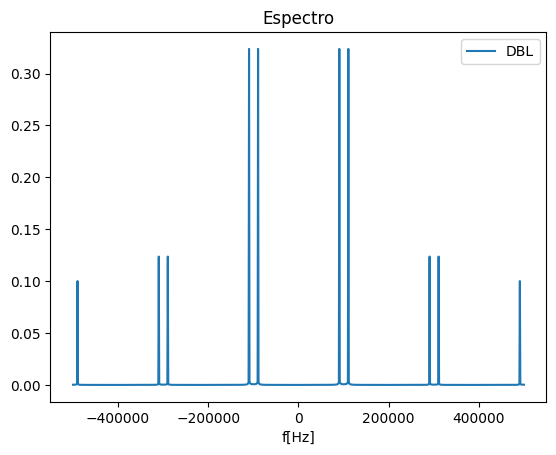

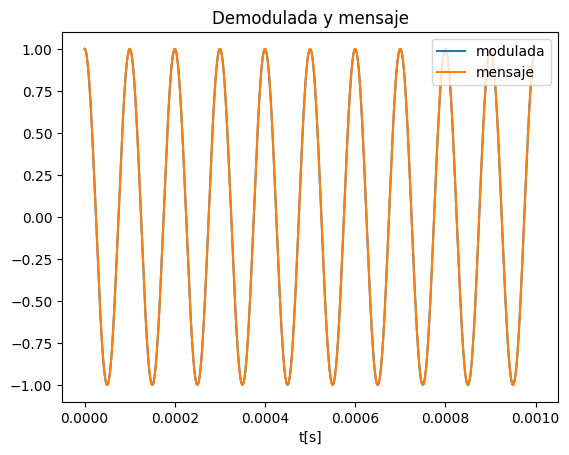

<Figure size 640x480 with 0 Axes>

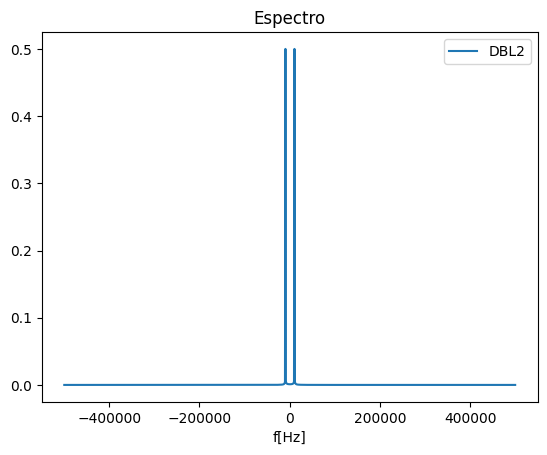

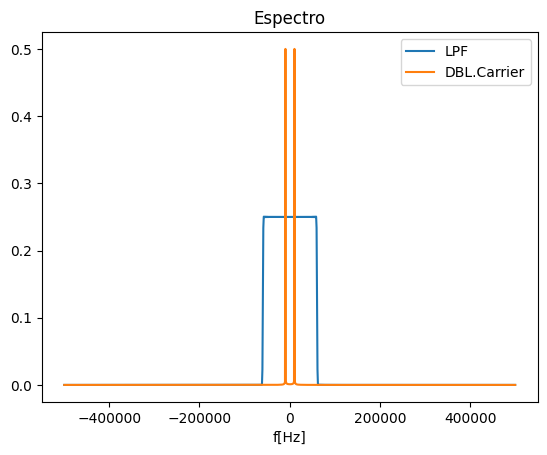

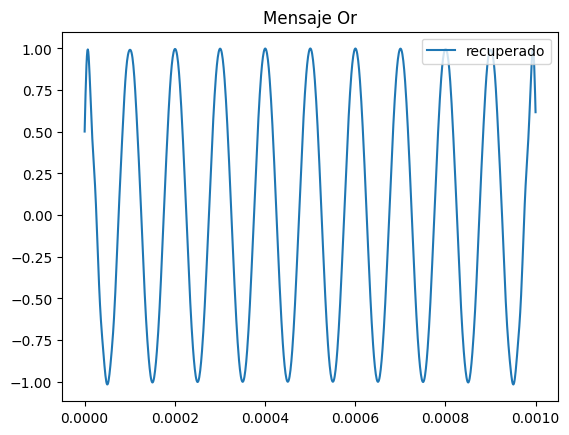

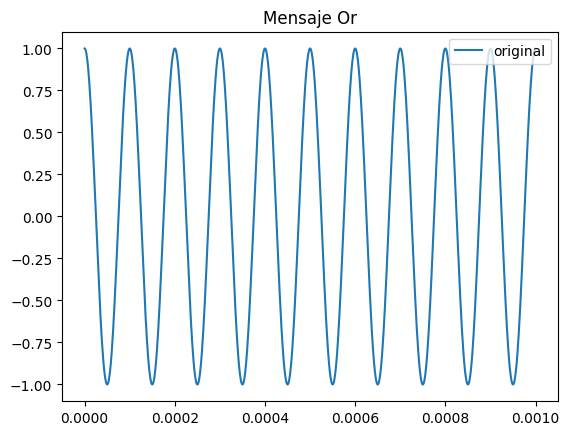

In [8]:
N=1000
t=np.linspace(0,1e-3,N) # un eje de tiempo de 1ms muestreado a 1us genera 1000 muestras
ts=t[1] # el primer diferencia entre la posicion "0" del vector de tiempo y la "1" es el tiempo de muestreo
fs=1/ts # la frecuencia de muestreo es la inversa del tiempo de muestreo
fmsj=10000 # frecuencia del mensaje Hz
fc=100000 # frecuencia de la portadora Hz

carrier=dsp.square(2*np.pi*fc*t)
msj=np.cos(2*np.pi*fmsj*t)
plt.figure()

plt.plot(t,carrier,label="portadora")
plt.plot(t,msj,label="mensaje")
plt.legend(loc='upper right')
plt.xlabel("t[s]")
plt.ticklabel_format(style="sci")
plt.title("Portadora y Mensaje")
print(fs)

DBL= M_DBL(msj,carrier)
plt.figure()

plt.plot(t,DBL,label="modulada")
plt.plot(t,msj,label="mensaje")
plt.legend(loc='upper right')
plt.xlabel("t[s]")
plt.title("Demodulada y mensaje")
plt.ticklabel_format(style="sci")


plt.figure()
plt.plot(t,DBL)
plt.plot(t,DBL,label="modulada")
plt.legend(loc='upper right')
plt.xlabel("t[s]")
plt.title("Demodulada DBL")
plt.ticklabel_format(style="sci")

# en el espectro
fcia=np.linspace(-fs/2,fs/2,N)
Fcarrier=np.abs(np.fft.fftshift(np.fft.fft(carrier)))/N
Fmsj=np.abs(np.fft.fftshift(np.fft.fft(msj)))/N
plt.figure()
plt.plot(fcia,Fcarrier,label="portadora")
plt.plot(fcia,Fmsj,label="mensaje")
plt.legend(loc='upper right')
plt.xlabel("f[Hz]")
plt.title("Espectro")


FDBL=np.abs(np.fft.fftshift(np.fft.fft(DBL)))/N
plt.figure()
plt.plot(fcia,FDBL,label="DBL")
plt.legend(loc='upper right')
plt.xlabel("f[Hz]")
plt.title("Espectro")

DBL2= M_DBL(DBL,carrier)
plt.figure()

plt.plot(t,DBL2,label="modulada")
plt.plot(t,msj,label="mensaje")
plt.legend(loc='upper right')
plt.xlabel("t[s]")
plt.title("Demodulada y mensaje")
plt.ticklabel_format(style="sci")

plt.figure()
FDBL2=np.abs(np.fft.fftshift(np.fft.fft(DBL2)))/N
plt.figure()
plt.plot(fcia,FDBL2,label="DBL2")
plt.legend(loc='upper right')
plt.xlabel("f[Hz]")
plt.title("Espectro")

taps=dsp.firwin(N,cutoff=60000,fs=fs)
LPF=np.abs(np.fft.fftshift(np.fft.fft(taps)))/N
plt.figure()
plt.plot(fcia,LPF*(N/4),label="LPF")  ## escale en (N/4) asi el filtro que sobre la es espectro como en el libro
plt.plot(fcia,FDBL2,label="DBL.Carrier")
plt.legend(loc='upper right')
plt.xlabel("f[Hz]")
plt.title("Espectro")

Rx=DEMOD_DBL(DBL,carrier,taps)
Rx=np.convolve(taps,DBL2,'same')
plt.figure()
#plt.plot(t,msj,label="original")
plt.plot(t,Rx,label="recuperado")



plt.legend(loc='upper right')

plt.title("Mensaje Or")

plt.figure()
plt.plot(t,msj,label="original")
plt.legend(loc='upper right')
plt.title("Mensaje Or")

Acá me resulta raro que la recuperada no esté más atenuada que la original. Los plotié en graficos separados para evitar superposición y confirmar.

###Sinusoidal - Exponencial Compleja
Ahora lo hago con una exponencial compleja de portadora

999000.0000000001


/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


'\nplt.legend(loc=\'upper right\')\n\nplt.title("Mensaje Or")\n\nplt.figure()\nplt.plot(t,msj,label="original")\nplt.legend(loc=\'upper right\')\nplt.title("Mensaje Or")\n'

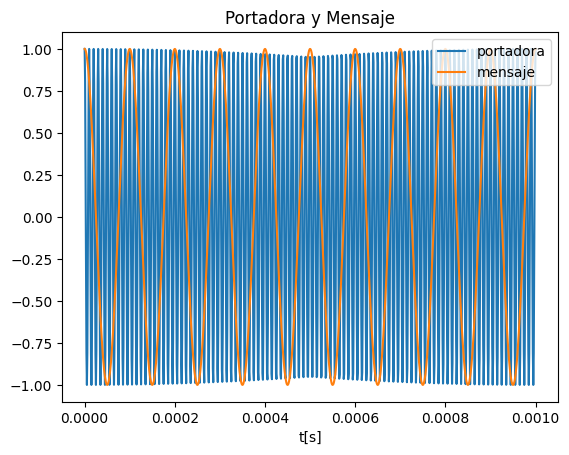

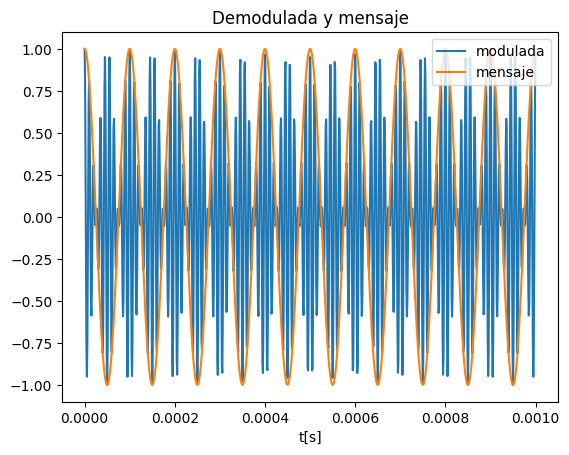

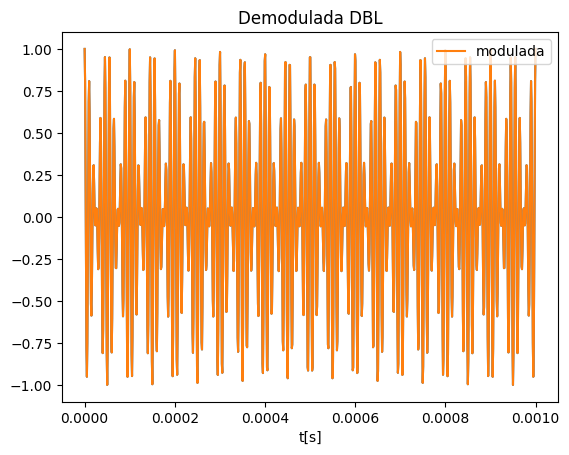

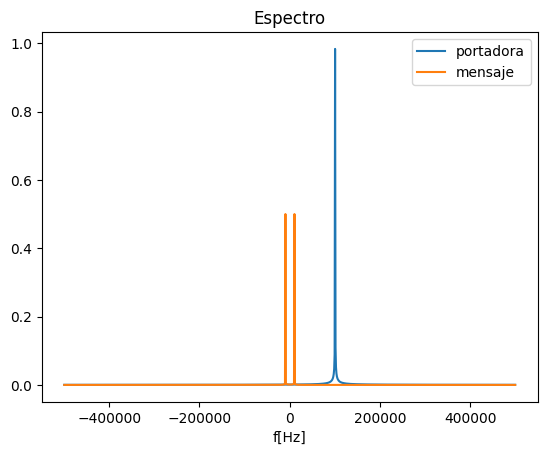

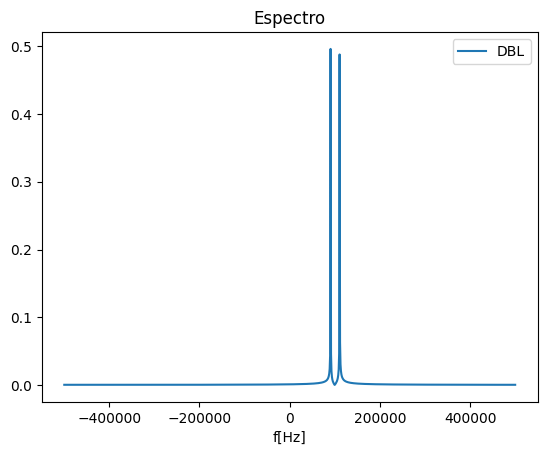

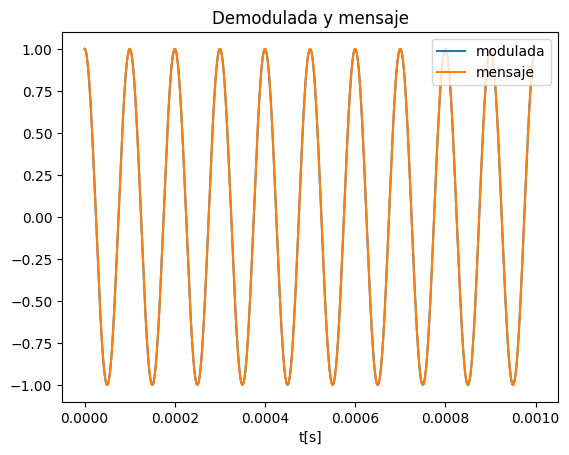

<Figure size 640x480 with 0 Axes>

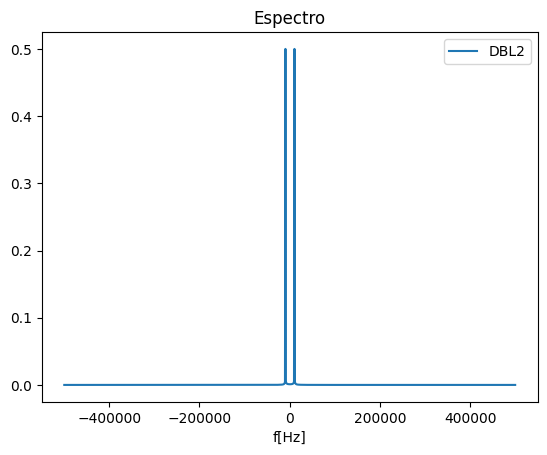

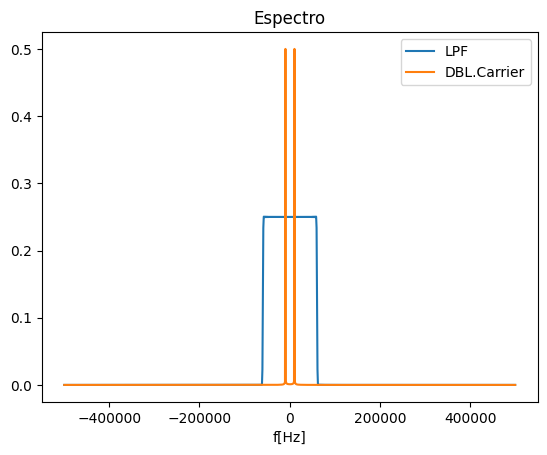

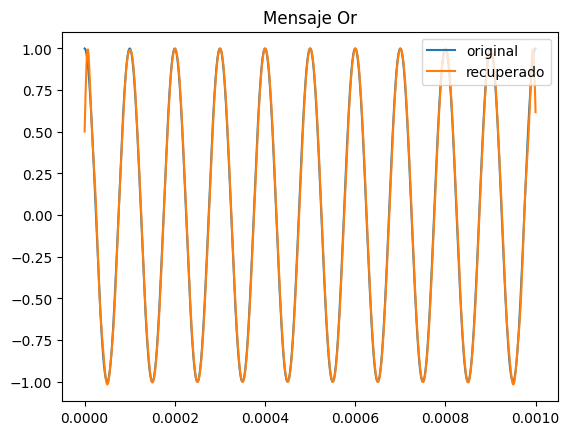

In [9]:
N=1000
t=np.linspace(0,1e-3,N) # un eje de tiempo de 1ms muestreado a 1us genera 1000 muestras
ts=t[1] # el primer diferencia entre la posicion "0" del vector de tiempo y la "1" es el tiempo de muestreo
fs=1/ts # la frecuencia de muestreo es la inversa del tiempo de muestreo
fmsj=10000 # frecuencia del mensaje Hz
fc=100000 # frecuencia de la portadora Hz

carrier=np.exp(1j*2*np.pi*fc*t)
msj=np.cos(2*np.pi*fmsj*t)
plt.figure()

plt.plot(t,carrier,label="portadora")
plt.plot(t,msj,label="mensaje")
plt.legend(loc='upper right')
plt.xlabel("t[s]")
plt.ticklabel_format(style="sci")
plt.title("Portadora y Mensaje")
print(fs)

DBL= M_DBL(msj,carrier)
plt.figure()

plt.plot(t,DBL,label="modulada")
plt.plot(t,msj,label="mensaje")
plt.legend(loc='upper right')
plt.xlabel("t[s]")
plt.title("Demodulada y mensaje")
plt.ticklabel_format(style="sci")


plt.figure()
plt.plot(t,DBL)
plt.plot(t,DBL,label="modulada")
plt.legend(loc='upper right')
plt.xlabel("t[s]")
plt.title("Demodulada DBL")
plt.ticklabel_format(style="sci")

# en el espectro
fcia=np.linspace(-fs/2,fs/2,N)
Fcarrier=np.abs(np.fft.fftshift(np.fft.fft(carrier)))/N
Fmsj=np.abs(np.fft.fftshift(np.fft.fft(msj)))/N
plt.figure()
plt.plot(fcia,Fcarrier,label="portadora")
plt.plot(fcia,Fmsj,label="mensaje")
plt.legend(loc='upper right')
plt.xlabel("f[Hz]")
plt.title("Espectro")


FDBL=np.abs(np.fft.fftshift(np.fft.fft(DBL)))/N
plt.figure()
plt.plot(fcia,FDBL,label="DBL")
plt.legend(loc='upper right')
plt.xlabel("f[Hz]")
plt.title("Espectro")

rx_complex_carrier = np.exp(-1j*2*np.pi*fc*t)

DBL2= M_DBL(DBL,rx_complex_carrier)
plt.figure()

plt.plot(t,DBL2,label="modulada")
plt.plot(t,msj,label="mensaje")
plt.legend(loc='upper right')
plt.xlabel("t[s]")
plt.title("Demodulada y mensaje")
plt.ticklabel_format(style="sci")

plt.figure()
FDBL2=np.abs(np.fft.fftshift(np.fft.fft(DBL2)))/N
plt.figure()
plt.plot(fcia,FDBL2,label="DBL2")
plt.legend(loc='upper right')
plt.xlabel("f[Hz]")
plt.title("Espectro")

taps=dsp.firwin(N,cutoff=60000,fs=fs)
LPF=np.abs(np.fft.fftshift(np.fft.fft(taps)))/N
plt.figure()
plt.plot(fcia,LPF*(N/4),label="LPF")  ## escale en (N/4) asi el filtro que sobre la es espectro como en el libro
plt.plot(fcia,FDBL2,label="DBL.Carrier")
plt.legend(loc='upper right')
plt.xlabel("f[Hz]")
plt.title("Espectro")

Rx=DEMOD_DBL(DBL,carrier,taps)
Rx=np.convolve(taps,DBL2,'same')
plt.figure()
plt.plot(t,msj,label="original")
plt.plot(t,Rx,label="recuperado")
plt.legend(loc='upper right')
plt.title("Mensaje Or")


'''
plt.legend(loc='upper right')

plt.title("Mensaje Or")

plt.figure()
plt.plot(t,msj,label="original")
plt.legend(loc='upper right')
plt.title("Mensaje Or")
'''

##Ejercicio 2
- Graficar la detección del mensajes para diferentes 0°,15°,45°,75° y 90°
- Que pasa cuando el angulo de desfasaje es 90°
- Simular para diferencias de fase mayores a 90° y menores a 360°.
- Extraer conclusiones.
- Simular la demodulacion del mensaje para errores de frecuencia de -2000,-1000,+1000,+2000

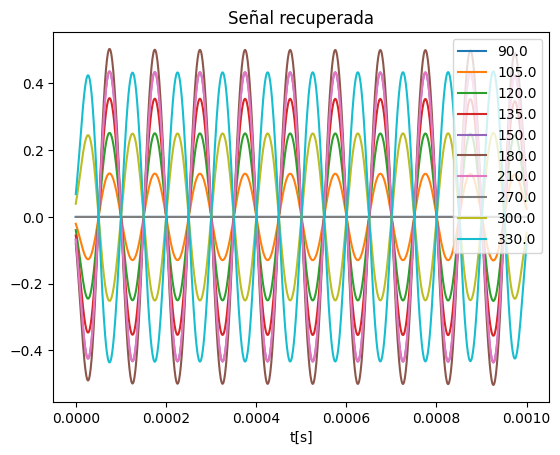

<Figure size 640x480 with 0 Axes>

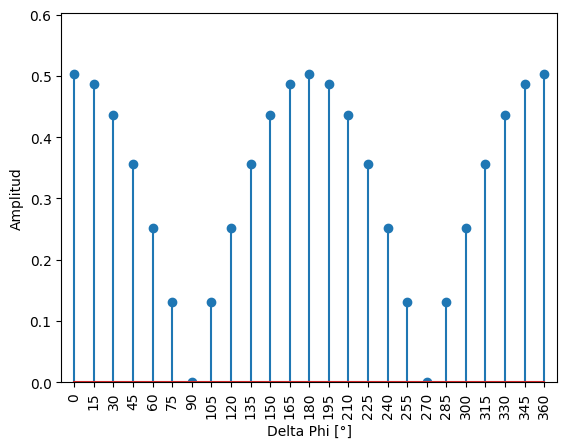

In [10]:
fmsj=10000 # frecuencia del mensaje Hz
fc=100000 # frecuencia de la portadora Hz
taps=dsp.firwin(N,cutoff=20000,fs=fs)
DeltaFase=[np.deg2rad(90),np.deg2rad(105),np.deg2rad(120),np.deg2rad(135),np.deg2rad(150),np.deg2rad(180),np.deg2rad(210),np.deg2rad(270),np.deg2rad(300),np.deg2rad(330)]

DBL= M_DBL(np.sin(2*np.pi*fmsj*t),np.cos(2*np.pi*fc*t))

for fase in DeltaFase:
    #print (fase)
    Rx=DEMOD_DBL(DBL,np.cos(2*np.pi*fc*t+fase),taps)
    plt.plot(t,Rx,label=round(np.rad2deg(fase),1))
    plt.legend(loc='upper right')
    plt.title("Señal recuperada")
    plt.xlabel("t[s]")


#Voy a graficar la amplitud en base a la diferencia de fase para que se vea mejor
amplitud = []
faseDeg = []
DeltaFaseComp = []
i = 0
label = []
while i <= 360:
  DeltaFaseComp.append(np.deg2rad(i))
  faseDeg.append(i)
  label.append(str(i))
  i += 15

for fase in DeltaFaseComp:
  Rx = DEMOD_DBL(DBL,np.cos(2*np.pi*fc*t+fase),taps)
  amplitud.append(np.max(Rx))

plt.figure()
fig, ax = plt.subplots()

ax.stem(faseDeg, amplitud)

ax.set(xlim=(faseDeg[0]-10, faseDeg[len(faseDeg)-1]+10),
       ylim=(0,np.max(amplitud)+0.1),xlabel='Delta Phi [°]',ylabel='Amplitud')
ax.set_xticks(faseDeg,label,rotation='vertical')

plt.show()

Aca se puede ver bien como la amplitud es máxima cuando la diferencia de fase es 0, 180 o 360 (0 nuevamente) y minima (atenuación total) cuando la diferencia es ortogonal (90, 270). En el medio se observa como aumenta y disminuye la amplitud y como se repite el efecto de atenuacion en los intervalos [0,90]U[180,270]

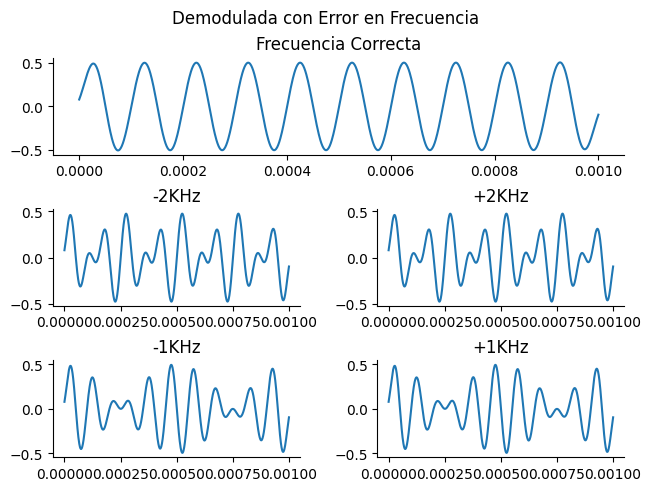

In [11]:
#Genero modulacion con portadora correcta
DBL= M_DBL(np.sin(2*np.pi*fmsj*t),np.cos(2*np.pi*fc*t))

#Genero mis portadoras con error y la demodulacion
error = [-2000,-1000,1000,2000,0]
portadoras = []
DEMOD_DBL_E = []
for e in error:
  port = np.cos(2*np.pi*(fc+e)*t)
  portadoras.append(port)
  DEMOD_DBL_E.append(DEMOD_DBL(DBL,port,taps))

#Ploteo las demodulaciones con el error

fig, ax_dict = plt.subplot_mosaic(
    [['norm','norm'],['-2000', '2000'],
     ['-1000', '1000']],layout="constrained"
)
fig.suptitle('Demodulada con Error en Frecuencia')

ax = ax_dict['norm']
ax.set_title("Frecuencia Correcta")
ax.plot(t, DEMOD_DBL_E[4])
ax.spines.left.set_position(('axes', 0))
ax.spines.bottom.set_position(('axes', 0))
ax.spines[['top', 'right']].set_visible(False)

ax = ax_dict['-2000']
ax.set_title("-2KHz")
ax.plot(t, DEMOD_DBL_E[0])
ax.spines.left.set_position(('axes', 0))
ax.spines.bottom.set_position(('axes', 0))
ax.spines[['top', 'right']].set_visible(False)

ax = ax_dict['-1000']
ax.set_title("-1KHz")
ax.plot(t, DEMOD_DBL_E[1])
ax.spines.left.set_position(('axes', 0))
ax.spines.bottom.set_position(('axes', 0))
ax.spines[['top', 'right']].set_visible(False)

ax = ax_dict['1000']
ax.set_title("+1KHz")
ax.plot(t, DEMOD_DBL_E[2])
ax.spines.left.set_position(('axes', 0))
ax.spines.bottom.set_position(('axes', 0))
ax.spines[['top', 'right']].set_visible(False)

ax = ax_dict['2000']
ax.set_title("+2KHz")
ax.plot(t, DEMOD_DBL_E[3])
ax.spines.left.set_position(('axes', 0))
ax.spines.bottom.set_position(('axes', 0))
ax.spines[['top', 'right']].set_visible(False)

plt.show()


Por mas que el error sea poco (1% y 2%) el impacto en la señal demodulada es bastante. Cabe destacar que no importa el signo del error, el resultado es el mismo.

##Ejercicio 3
- Hacer una funcion que reciba como parametros mensajeI, mensajeQ, CarrierI, CarrierQ y devuelva una señal modulada en cuadratura.
- Idem funcion para demodular

In [12]:
def DBLQ_MOD(mensajeI, mensajeQ, CarrierI, CarrierQ):
  return (M_DBL(mensajeI, CarrierI)+M_DBL(mensajeQ,CarrierQ))

def DBLQ_DMOD(CarrierI, CarrierQ, DBL, taps):
  DMOD = []
  DMOD.append(DEMOD_DBL(CarrierI,DBL,taps))
  DMOD.append(DEMOD_DBL(CarrierQ,DBL,taps))
  return DMOD

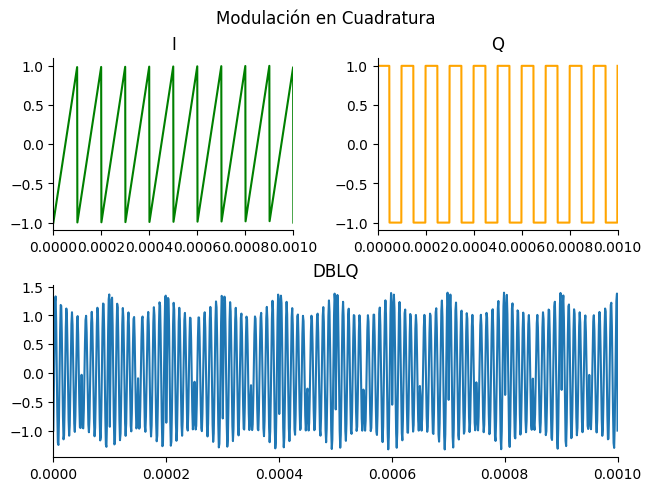

In [13]:
#Testeo función Modulación en Cuadratura
fmsj=10000
fc=100000

mI = dsp.sawtooth(2*np.pi*fmsj*t)
mQ = dsp.square(2*np.pi*fmsj*t)
cI = np.cos(2*np.pi*fc*t)
cQ = np.sin(2*np.pi*fc*t)

DBLQ = DBLQ_MOD(mI,mQ,cI,cQ)

#Ploteo

fig, ax_dict = plt.subplot_mosaic(
    [['I','Q'],
     ['DBLQ', 'DBLQ']],layout="constrained"
)
fig.suptitle('Modulación en Cuadratura')

ax = ax_dict['I']
ax.set_title("I")
ax.plot(t, mI, color='green')
ax.set_xlim(0,t[len(t)-1])
ax.spines.left.set_position(('axes', 0))
ax.spines.bottom.set_position(('axes', 0))
ax.spines[['top', 'right']].set_visible(False)

ax = ax_dict['Q']
ax.set_title("Q")
ax.plot(t, mQ,color='orange')
ax.set_xlim(0,t[len(t)-1])
ax.spines.left.set_position(('axes', 0))
ax.spines.bottom.set_position(('axes', 0))
ax.spines[['top', 'right']].set_visible(False)

ax = ax_dict['DBLQ']
ax.set_title("DBLQ")
ax.set_xlim(0,t[len(t)-1])
ax.plot(t, DBLQ)
ax.spines.left.set_position(('axes', 0))
ax.spines.bottom.set_position(('axes', 0))
ax.spines[['top', 'right']].set_visible(False)
plt.show()

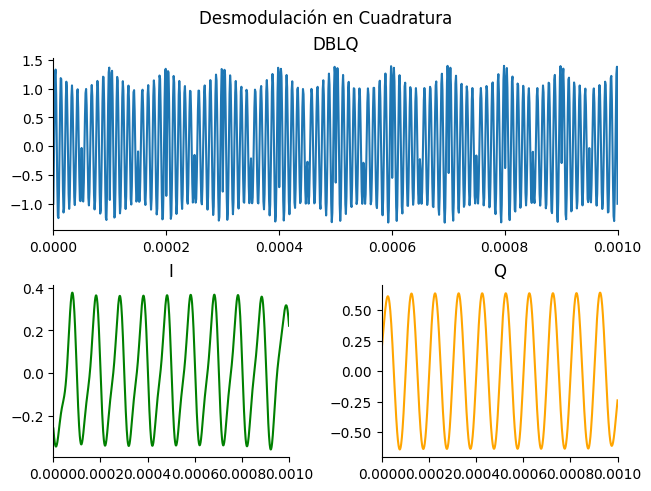

In [14]:
#Testeo función Desmodulación en Cuadratura

DBLQ_DEMOD = DBLQ_DMOD(cI,cQ,DBLQ,taps)

#Ploteo

fig, ax_dict = plt.subplot_mosaic(
    [['DBLQ', 'DBLQ'],
     ['I','Q']],
    layout="constrained"
)
fig.suptitle('Desmodulación en Cuadratura')

ax = ax_dict['I']
ax.set_title("I")
ax.plot(t, DBLQ_DEMOD[0], color='green')
ax.set_xlim(0,t[len(t)-1])
ax.spines.left.set_position(('axes', 0))
ax.spines.bottom.set_position(('axes', 0))
ax.spines[['top', 'right']].set_visible(False)

ax = ax_dict['Q']
ax.set_title("Q")
ax.plot(t, DBLQ_DEMOD[1],color='orange')
ax.set_xlim(0,t[len(t)-1])
#ax.set_xlim(0,0.0002)
ax.spines.left.set_position(('axes', 0))
ax.spines.bottom.set_position(('axes', 0))
ax.spines[['top', 'right']].set_visible(False)

ax = ax_dict['DBLQ']
ax.set_title("DBLQ")
ax.set_xlim(0,t[len(t)-1])
ax.plot(t, DBLQ)
ax.spines.left.set_position(('axes', 0))
ax.spines.bottom.set_position(('axes', 0))
ax.spines[['top', 'right']].set_visible(False)
plt.show()

##Ejercicio 4
Implementar un demodulador de AM que reciba una señal modulada en AM, un float con el valor de la frecuencia de portadora,un float con la frecuencia de muestreo fs y los taps del filtro y devuelva el mensaje

- cambiar la generacion de portadora entre seno coseno, agregar fases (Variable carrier)
- Como es la deteccion??
- Que pasa si en vez de np.exp() en el demodulador usamos sp.sin() o np.cos() ??

In [15]:
def AM_DEMOD(VAM,fc, fs,taps):
  VAM_rec=[]
  for sample in range(len(VAM)):
    #    print(sample)
    if VAM[sample]>0:
        VAM_rec.append(VAM[sample])
    else:
        VAM_rec.append(-VAM[sample])

  envol = np.convolve(VAM_rec,taps,mode='same')
  return envol

def M_AM(msj,carrier,m):
    return ((1+m*msj)*carrier)


###EJ4 Pedido

In [16]:
m=1
Ec=1
fmsj=5000
fc=300000 # frecuencia de la portadora Hz

#msj=dsp.sawtooth(2*np.pi*fmsj*t)   # triangular
#msj=dsp.square(2*np.pi*fmsj*t)      # cuadrada

msj=np.sin(2*np.pi*fmsj*t)          # senoidal
carrier=Ec*np.cos(2*np.pi*fc*t)
VAM=M_AM(msj,carrier,m)
fir = dsp.firwin(len(VAM),cutoff=20000,fs=fs)
DAM = AM_DEMOD(VAM,fc, fs,fir)
FAM=np.abs(np.fft.fftshift(np.fft.fft(VAM)))/N
FDAM=np.abs(np.fft.fftshift(np.fft.fft(DAM)))/N

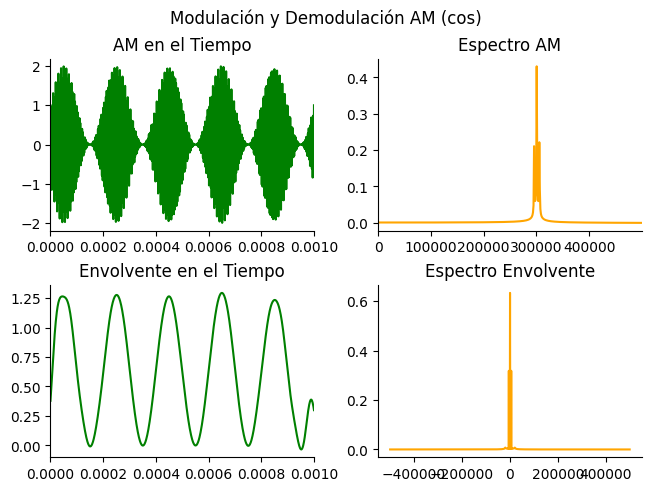

In [17]:
########## PLOTEO ##########
fig, ax_dict = plt.subplot_mosaic(
    [['AM_T','AM_F'],
     ['AMD_T', 'AMD_F']],layout="constrained"
)
fig.suptitle('Modulación y Demodulación AM (cos)')

ax = ax_dict['AM_T']
ax.set_title("AM en el Tiempo")
ax.plot(t, VAM, color='green')
ax.set_xlim(0,t[len(t)-1])
ax.spines.left.set_position(('axes', 0))
ax.spines.bottom.set_position(('axes', 0))
ax.spines[['top', 'right']].set_visible(False)

ax = ax_dict['AM_F']
ax.set_title("Espectro AM")
ax.plot(fcia, FAM,color='orange')
ax.set_xlim(0,fcia[len(fcia)-1])
ax.spines.left.set_position(('axes', 0))
ax.spines.bottom.set_position(('axes', 0))
ax.spines[['top', 'right']].set_visible(False)

ax = ax_dict['AMD_T']
ax.set_title("Envolvente en el Tiempo")
ax.plot(t, DAM,color='green')
ax.set_xlim(0,t[len(t)-1])
ax.spines.left.set_position(('axes', 0))
ax.spines.bottom.set_position(('axes', 0))
ax.spines[['top', 'right']].set_visible(False)


ax = ax_dict['AMD_F']
ax.set_title("Espectro Envolvente")
ax.plot(fcia, FDAM,color='orange')
#ax.set_xlim(0,fcia[len(fcia)-1])
ax.spines.left.set_position(('axes', 0))
ax.spines.bottom.set_position(('axes', 0))
ax.spines[['top', 'right']].set_visible(False)
plt.show()

###EJ4.Prueba.LPF.Adaptivo

In [18]:
'''
Acá lo que estoy intentando hacer es adaptar el LPF
para que ponga la frecuencia de corte de manera automatica
dependiendo de la frecuencia del mensaje
(no se porque, estaba jugando y lo quise probar jaja)
Jugando me di cuenta que podes aumentar la frecuencia del mensaje hasta que
la frecuencia de corte del filtro supera fs, igual no se porque para frecuencias mayores a 5khz no anda
'''
#Para ver mejor porque uso estas funciones te dejo un link
#A un colab que hice a fines del año pasado donde uso los datos que
#Medimos en el lab y juego con otras cosas
#https://colab.research.google.com/drive/1fABAWncrOO9zTudyFcMdUiwis4hiq_Lo?usp=sharing
#El link solo tiene permiso de LECTURA (Tus cambios no se guardan)
def F_MSG(VAM, fs):
  """
  Nose como hacer bien para sacarle la frecuencia a la envolvente
  utilizando el script de pablo (ciclo for funcion de abajo) asique
  hago un poco de trampa y uso la funcion de find_peaks de signal py que tecnicamente
  ya me devuelve la envolvente filtrada
  """
  result = []

  #Tomo la Envolvente usando scipy.signal
  peaks, _ = find_peaks(VAM, height=0)

  #Encuentro la caracterización de la señal envolvente
  argEmax = np.argmax(VAM[peaks])
  argEmin = np.argmin(VAM[peaks])

  #Copio el eje de tiempo que tiene VAM
  t = np.linspace(0,(1/fs)*len(VAM),len(VAM))

  #Como la diferencia de tiempo entre Emax y Emin
  #Se supone que es la mitad del periodo, multiplico por 2 y tengo T
  T = np.abs((t[peaks[argEmin]]-t[peaks[argEmax]])*2)
  fmsg = 1/(T)

  #Retorno todo en para poder plotear el resultado de find_peaks
  print("Frecuencia del mensaje = ", fmsg, "Hz")
  result.append(fmsg)
  result.append(peaks)
  return result

def AM_DEMOD_X(VAM, fs, fc):
  #Funcion pablo envolvente
  VAM_rec = []
  fcut = 20000 #Defino default en 20KHz
  result = []

  for sample in range(len(VAM)):
    #    print(sample)
    if VAM[sample]>0:
        VAM_rec.append(VAM[sample])
    else:
        VAM_rec.append(-VAM[sample])
  #Busco fmsg para adaptar el filtro
  peaks = F_MSG(VAM,fs)
  if(4*peaks[0] < fs/2):
    fcut = 4*peaks[0]
  else:
    fcut = (fs/2)-10

  #Filtro FIR
  fir = dsp.firwin(len(VAM_rec),cutoff=fcut,fs=fs)
  #Aplico el filtro con la convolusión
  result.append(np.convolve(VAM_rec,fir,mode='same'))
  result.append(peaks[0])
  result.append(peaks[1])
  return result

Frecuencia del mensaje =  167.05685618729095 Hz


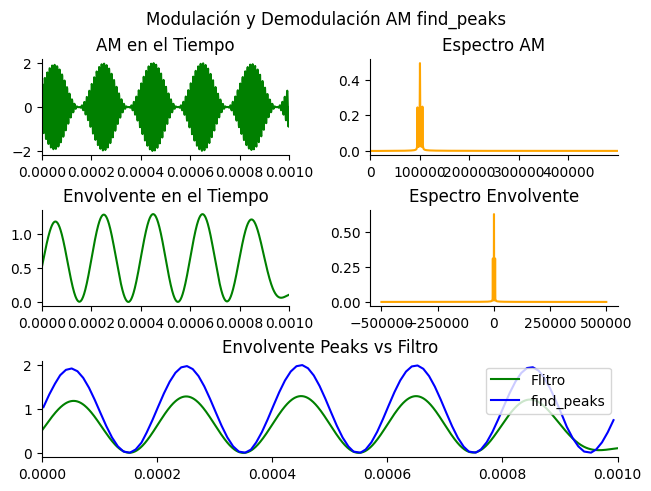

In [19]:
m=1
Ec=1
fmsj=5000
fc=100000 # frecuencia de la portadora Hz

#msj=dsp.sawtooth(2*np.pi*fmsj*t)   # triangular
#msj=dsp.square(2*np.pi*fmsj*t)      # cuadrada

msj=np.sin(2*np.pi*fmsj*t)          # senoidal
carrier=Ec*np.sin(2*np.pi*fc*t)     # senoidal
VAM=M_AM(msj,carrier,m)
DAM = AM_DEMOD_X(VAM,fc,fs)
FAM=np.abs(np.fft.fftshift(np.fft.fft(VAM)))/N
FDAM=np.abs(np.fft.fftshift(np.fft.fft(DAM[0])))/N

########## PLOTEO ##########
fig, ax_dict = plt.subplot_mosaic(
    [['AM_T','AM_F'],
     ['AMD_T', 'AMD_F'],
     ['PEAKS','PEAKS']],layout="constrained"
)
fig.suptitle('Modulación y Demodulación AM find_peaks')

ax = ax_dict['AM_T']
ax.set_title("AM en el Tiempo")
ax.plot(t, VAM, color='green')
ax.set_xlim(0,t[len(t)-1])
ax.spines.left.set_position(('axes', 0))
ax.spines.bottom.set_position(('axes', 0))
ax.spines[['top', 'right']].set_visible(False)

ax = ax_dict['AM_F']
ax.set_title("Espectro AM")
ax.plot(fcia, FAM,color='orange')
ax.set_xlim(0,fcia[len(fcia)-1])
ax.spines.left.set_position(('axes', 0))
ax.spines.bottom.set_position(('axes', 0))
ax.spines[['top', 'right']].set_visible(False)

ax = ax_dict['AMD_T']
ax.set_title("Envolvente en el Tiempo")
ax.plot(t, DAM[0],color='green')
ax.set_xlim(0,t[len(t)-1])
ax.spines.left.set_position(('axes', 0))
ax.spines.bottom.set_position(('axes', 0))
ax.spines[['top', 'right']].set_visible(False)


ax = ax_dict['AMD_F']
ax.set_title("Espectro Envolvente")
ax.plot(fcia, FDAM,color='orange')
#ax.set_xlim(0,fcia[len(fcia)-1])
ax.spines.left.set_position(('axes', 0))
ax.spines.bottom.set_position(('axes', 0))
ax.spines[['top', 'right']].set_visible(False)

ax = ax_dict['PEAKS']
ax.set_title("Envolvente Peaks vs Filtro")
ax.plot(t, DAM[0], color='green', label='Flitro')
ax.plot(t[DAM[2]], VAM[DAM[2]], color='blue', label='find_peaks')
ax.legend()
ax.set_xlim(0,t[len(t)-1])
ax.spines.left.set_position(('axes', 0))
ax.spines.bottom.set_position(('axes', 0))
ax.spines[['top', 'right']].set_visible(False)
plt.show()

###Test Mult GNU

(-100000.0, 100000.0)

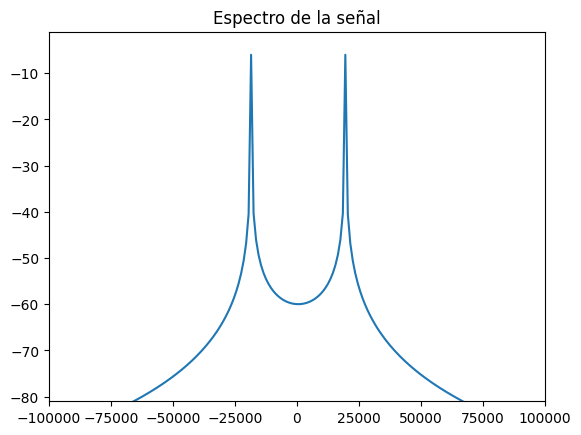

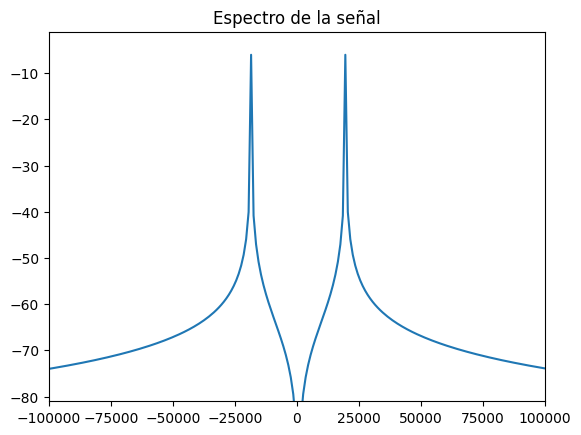

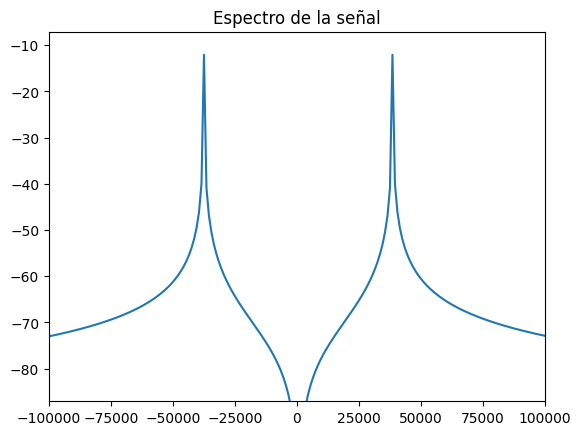

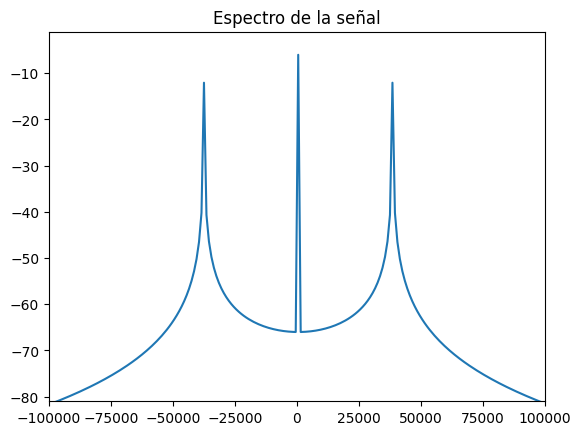

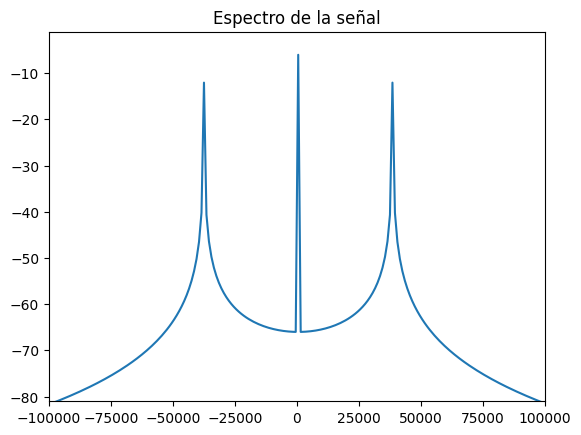

In [26]:
#Hago el piloto
x = 100e3
pilot_sin = np.sin(2*np.pi*19e3*t)
pilot_cos = np.cos(2*np.pi*19e3*t)
pilot_mix = M_DBL(pilot_cos, pilot_sin)
pilot_square_cos = M_DBL(pilot_cos, pilot_cos)
pilot_square_sin = M_DBL(pilot_sin, pilot_sin)

plot_spec(pilot_cos,fs)
plt.xlim(-x,x)
plot_spec(pilot_sin,fs)
plt.xlim(-x,x)
plot_spec(pilot_mix,fs)
plt.xlim(-x,x)
plot_spec(pilot_square_cos,fs)
plt.xlim(-x,x)
plot_spec(pilot_square_sin,fs)
plt.xlim(-x,x)